In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
# Loading  data
df = pd.read_csv('data_balanced_cv.csv')

# Data Preparation

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Scaling Data

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(df.drop('Y',axis=1))

StandardScaler()

In [6]:
scaled_features = scaler.fit_transform(df.drop('Y',axis=1))

Setting up datasets

In [7]:
X = pd.DataFrame(scaled_features,columns=df.columns[:-1]).values
y = df['Y'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.regularizers import L1, L2, L1L2

In [10]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score, roc_curve, classification_report, auc

In [11]:
def create_net(nodes_1 = 30, nodes_2 = 30, nodes_3 = 30)

    # create model
    dnn = Sequential()
        
    # hidden layer
    dnn.add(Dense(nodes_1, input_dim=X_train.shape[1], kernel_initializer='normal',kernel_regularizer=L2(0.01),activation='relu'))
    #dnn.add(Dropout(0.2))

    # hidden layer
    dnn.add(Dense(nodes_2, kernel_initializer='normal',kernel_regularizer=L2(0.01),activation='relu'))
    #dnn.add(Dropout(0.2))

    # hidden layer
    dnn.add(Dense(nodes_3, kernel_initializer='normal',kernel_regularizer=L2(0.01),activation='relu'))
    #dnn.add(Dropout(0.2))

    # output layer
    dnn.add(Dense(1, kernel_initializer='normal',kernel_regularizer=L2(0.01),activation='sigmoid'))

    # Compile model
    dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return dnn

In [12]:
es = EarlyStopping(monitor='loss', patience=25, restore_best_weights=True)

In [ ]:
# Wrap Keras model so it can be used by scikit-learn
dnn = KerasClassifier(build_fn=create_network, verbose=0)

In [13]:
#t0 = datetime.now()
#dnn.fit(x=X_train, 
#          y=y_train, 
#          epochs=500,
#          batch_size=10,
#          validation_data=(X_test, y_test), 
#          callbacks=es,
#          verbose=0)
#t1 = datetime.now()
#print("Training Time: ", (t1 - t0))

Training Time:  0:05:14.530435


<AxesSubplot:>

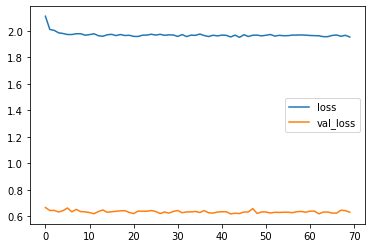

In [16]:
losses = pd.DataFrame(dnn.history.history)
losses[['loss','val_loss']].plot()

<AxesSubplot:>

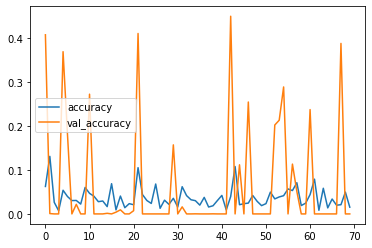

In [17]:
losses[['accuracy','val_accuracy']].plot()

In [30]:
predictions = dnn.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [31]:
confusion_matrix(y_test,predictions)

array([[  21,    0, 1111,  834,  204,  180,  329],
       [   7,    0,  311,  676,   32,   81, 1258],
       [   0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0]], dtype=int64)

In [32]:
plt.figure(figsize=(7, 5))

predictions = dnn.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, predictions)

auc_keras = auc(fpr_keras, tpr_keras)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='DNN (AUC = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\ann_roc.png')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [5044, 126100]

In [47]:
kappa = cohen_kappa_score(y_test, predictions)
print("Cohen's Kappa: %.2f%%" % (kappa*100))

Cohen's Kappa: 47.47%
